In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
from RediCell_cupy import *
from DesignTool import *
import pickle

In [2]:
b = pickle.load(open('full_ecoli.pkl', 'rb'))

In [3]:
from pathlib import Path
import os
p = Path('full_ecoli.npy')
with p.open('rb') as f:
    fsz = os.fstat(f.fileno()).st_size
    out = np.load(f)
    data = [out]
    while f.tell() < fsz:
        data.append(np.load(f))

In [4]:
traj = np.array(data)

In [5]:
traj.shape

(491, 12, 119, 57, 57)

In [6]:
traj[:, b.mol_to_id['mY']].sum((1, 2, 3))

array([ 0.,  0.,  0.,  1.,  2.,  2.,  3.,  5.,  5.,  5.,  6.,  6.,  6.,
        7.,  6.,  6.,  8.,  8., 10., 11., 12., 12., 12., 14., 14., 14.,
       14., 14., 14., 14., 14., 13., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6

In [7]:
def plot_time_trace(species, time_step, record_freq):
    for s in species:
        plt.plot(np.arange(len(traj))*record_freq*time_step, traj[:, b.mol_to_id[s]].sum((1, 2, 3)), label=s)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xlabel('Time (s)')
    plt.ylabel('Count')

In [8]:
b.mol_to_id

{'Iex': 0,
 'I': 1,
 'Y': 2,
 'YI': 3,
 'R2': 4,
 'R2O': 5,
 'IR2': 6,
 'O': 7,
 'IR2O': 8,
 'I2R2O': 9,
 'mY': 10,
 'I2R2': 11}

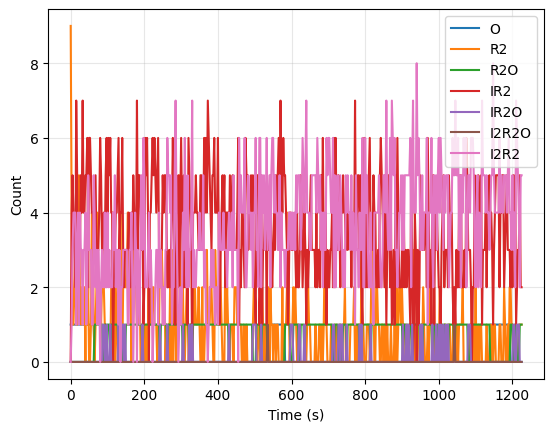

In [11]:
plot_time_trace(['O', 'R2', 'R2O', 'IR2', 'IR2O', 'I2R2O', 'I2R2'], 50e-6, 50000)

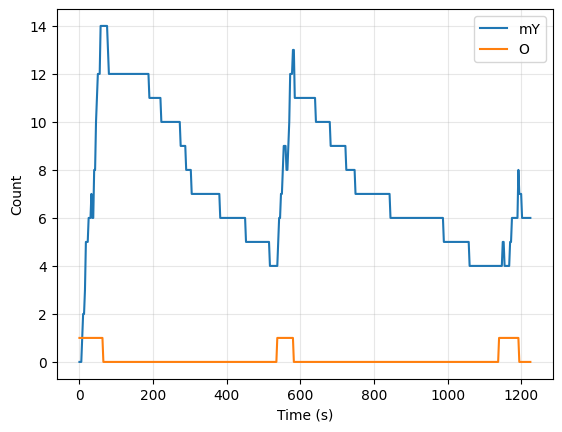

In [14]:
plot_time_trace(['mY', 'O'], 50e-6, 50000)

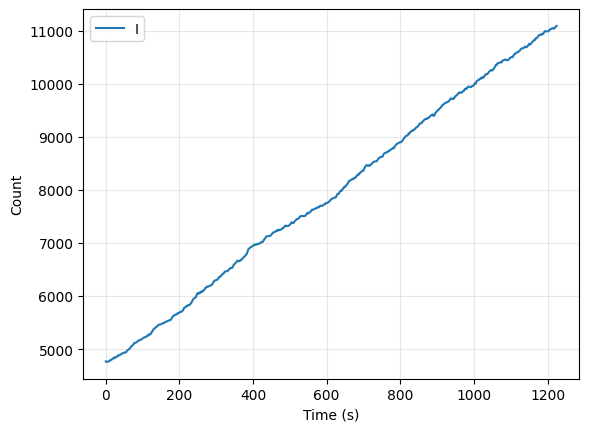

In [10]:
plot_time_trace(['I'], 50e-6, 50000)

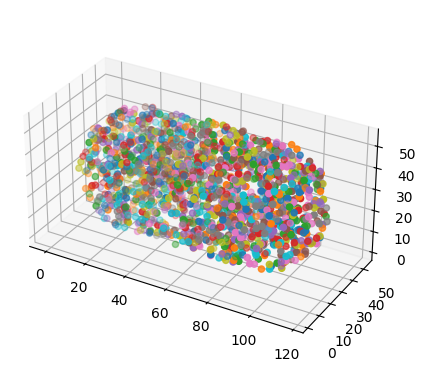

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for idx, frame in enumerate(traj[:, b.mol_to_id['mY']]):
    loc = np.where(frame)
    ax.scatter(loc[0], loc[1], loc[2])
xs, ys, zs = [b.mesh[x].get() for x in range(b.ndim)]
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))